In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
data={
    "pass_id": np.arange(0,1000),
    "survive": np.random.choice(['yes', 'no'], size=1000),
    "pclass": np.random.choice(['top', 'ave', 'poor'], size=1000),
    "age": np.random.randint(10, 80, size=1000),
    "name": ["Mo_"+str(i) for i in range(0,1000)],
    "sex": np.random.choice(['M', 'F'], size=1000)

}
df=pd.DataFrame(data)
df.head()

,pass_id,survive,pclass,age,name,sex
0,0,no,top,57,Mo_0,M
1,1,yes,ave,72,Mo_1,M
2,2,yes,ave,22,Mo_2,F
3,3,yes,top,32,Mo_3,F
4,4,yes,top,79,Mo_4,F


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pass_id  1000 non-null   int32 
 1   survive  1000 non-null   object
 2   pclass   1000 non-null   object
 3   age      1000 non-null   int32 
 4   name     1000 non-null   object
 5   sex      1000 non-null   object
dtypes: int32(2), object(4)
memory usage: 39.2+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pass_id,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
age,1000.0,43.818,20.126449,10.0,26.00,43.0,61.00,79.0


In [8]:
df.isnull().sum()

pass_id    0
survive    0
pclass     0
age        0
name       0
sex        0
dtype: int64

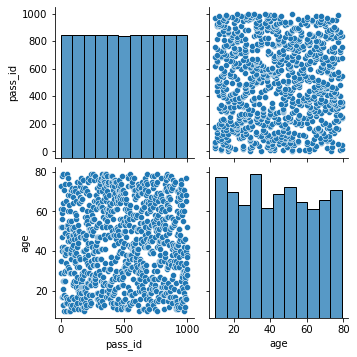

In [9]:
sns.pairplot(df)

<AxesSubplot:>

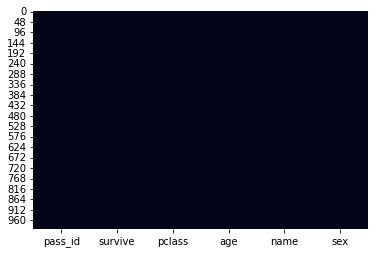

In [10]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:xlabel='survive', ylabel='count'>

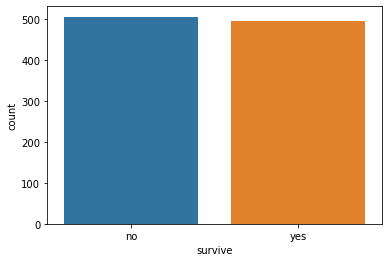

In [11]:
sns.countplot(data=df, x='survive')

<AxesSubplot:xlabel='survive', ylabel='count'>

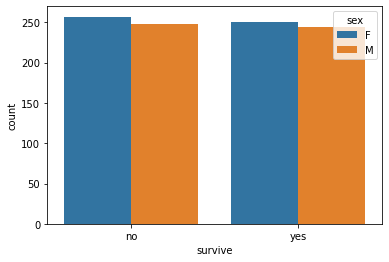

In [12]:
sns.countplot(data=df, x='survive', hue='sex')

<AxesSubplot:xlabel='survive', ylabel='count'>

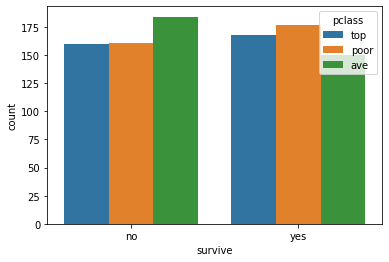

In [13]:
sns.countplot(data=df, x='survive', hue='pclass')

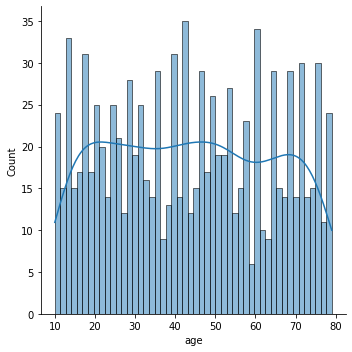

In [14]:
sns.displot(data=df, x='age', kde=True, bins=50)

<AxesSubplot:xlabel='pclass', ylabel='age'>

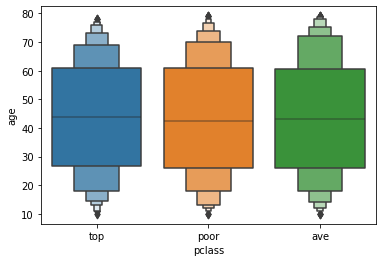

In [15]:
sns.boxenplot(data=df, x='pclass', y='age')

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [31]:
pclass_mapping = {'poor':0, 'ave':1, 'top':2}
df['pclass'] =  df['pclass'].map(pclass_mapping)

In [32]:
encod_cols=['sex', 'survive']
encode={}
for col in encod_cols:
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])
    #encode[col]=le

In [33]:
df.head()

,pass_id,survive,pclass,age,name,sex
0,0,0,2,57,Mo_0,1
1,1,1,1,72,Mo_1,1
2,2,1,1,22,Mo_2,0
3,3,1,2,32,Mo_3,0
4,4,1,2,79,Mo_4,0


In [36]:
df.drop(columns='name', axis=1, inplace=True)
df.columns

Index(['pass_id', 'survive', 'pclass', 'age', 'sex'], dtype='object')

In [37]:
x=df.drop('survive', axis=1)
y=df['survive']

In [41]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=123)

In [44]:
print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()

In [48]:
model.fit(X_train, y_train)


LogisticRegression()

In [49]:
pred=model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[57 42]
 [47 54]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        99
           1       0.56      0.53      0.55       101

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.55       200

